# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

### For reproducability

In [47]:
np.random.seed(1)

## Functions

In [159]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [138]:
#Bootstrap Data
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#Repeat bootstrap x amount of times based on size
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

## 1. Is the distribution of body temperatures normal?

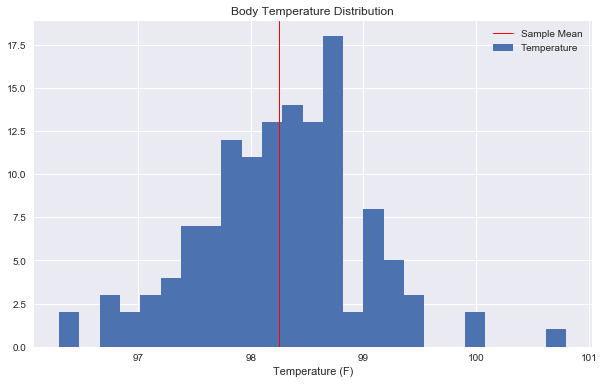

In [303]:
# Plot histogram of body temperature to show distribution with sample mean shown
y_range = np.arange(0,20)

_ = plt.figure(figsize=(10,6))
_ = plt.hist(df.temperature, bins=25)
_ = plt.axvline(np.mean(df.temperature), color='red', linewidth=1)
_ = plt.title('Body Temperature Distribution')
_ = plt.xlabel('Temperature (F)')
_ = plt.legend(('Sample Mean', 'Temperature'))

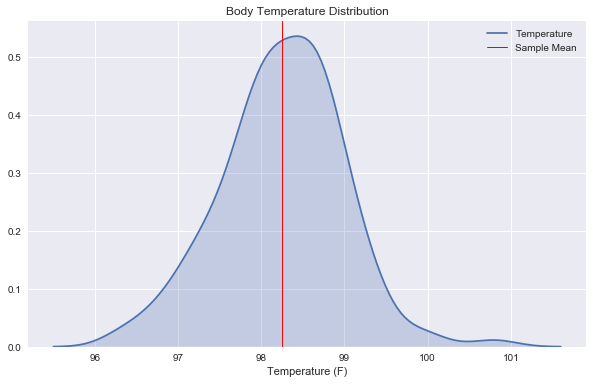

In [302]:
#Plot KDE plot of temperature distribution with sample mean shown
_ = plt.figure(figsize=(10,6))
_ = sns.kdeplot(df.temperature, shade=True)
_ = plt.axvline(np.mean(df.temperature), color='red', linewidth=1)
_ = plt.title('Body Temperature Distribution')
_ = plt.xlabel('Temperature (F)')
_ = plt.legend(('Temperature', 'Sample Mean'))

## 2. Is the sample size large? Are the observations independent?

#### Sample size is 130 which is relatively large.  Observations are independent.

In [49]:
print('Sample Size: ', df.temperature.count())

Sample Size:  130


## 3. Is the true population mean really 98.6 degrees F?
- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the $t$ or $z$ statistic?
- Now try using the other test. How is the result be different? Why?

In [50]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [237]:
print('The sample population mean is: ', np.mean(df.temperature))

The sample population mean is:  98.24923076923078


### Bootstrap Hypothesis Testing
- Null Hypothesis: The true population mean is 98.6 degrees F.
- Alternative Hypothesis: The true population mean is not 98.6 degrees F.

In [242]:
#Get bootstrap mean
bs_replicates_mean = draw_bs_reps(df.temperature, np.mean, 1000)

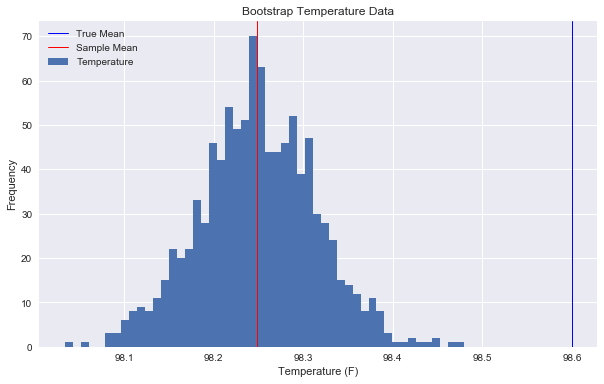

In [281]:
#Plot Bootstrap Temperature mean data with true and sample means shown
_ = plt.figure(figsize=(10,6))
_ = plt.hist(bs_replicates_mean, bins=50)
_ = plt.axvline(98.6, color='blue', linewidth=1)
_ = plt.axvline(np.mean(bs_replicates_mean), color='red', linewidth=1)
_ = plt.title('Bootstrapped Temperature Means')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Frequency')
_ = plt.legend(('True Mean','Sample Mean', 'Temperature'))

## z-test

In [236]:
#Calculate/print z-score
print('Z-score: ', (np.mean(bs_replicates_mean) - 98.6) / np.std(bs_replicates_mean))

Z-score:  -5.653659892503476


## P-value

In [206]:
#Calculate/print p-value
print('P-value: ', np.sum(bs_replicates_mean >= 98.6) / len(bs_replicates_mean))

P-value:  0.0


### Conclusion

The probability to getting a true mean of 98.6 F or higher is extremely low (P-value is nearly 0).  We can reject the null hypothesis and assume that the true population mean differs from 98.6 F.

## One-sample or two-sample test? Why?
In this case a two-sample test is more appropriate as we do not know where along the distribution 98.6 will lie.  Therefore we must look at both ends of the distribution to determine whether or not to accept the null hypothesis.

## t or z statistic?
Z-statistic is more appropriate in this case because:
1. the sample size is greater than 30 (n > 30)
2. we have both the mean and std of the sample.

### Mean & Z-statistic

In [284]:
#Print sample mean and z-statistic
print('Sample Mean: ', np.mean(df.temperature))
print('z-statistic: ', (np.mean(df.temperature) - 98.6) / (np.std(df.temperature) / np.sqrt(len(df.temperature))))

Sample Mean:  98.24923076923078
z-statistic:  -5.475925202078116


## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
- Which one is the correct one to use? 
- What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [285]:
#Draw small sample of size 10
small_sample = np.random.choice(df.temperature, 10)

In [191]:
small_sample

array([97.5, 99. , 98.4, 97.8, 97.5, 99. , 97.9, 98.1, 98.5, 97.7])

### Because sample size is so small (n < 10), t-test is a better statistic for this case.
Null Hypothesis: The true population mean is 98.6 F.<br>
Alternartive Hypothesis: The true population mean is not 98.6 F.

In [192]:
#Get bootstrap replicates taken from small sample size
bs_replicates_small = draw_bs_reps(small_sample, np.mean, 1000)

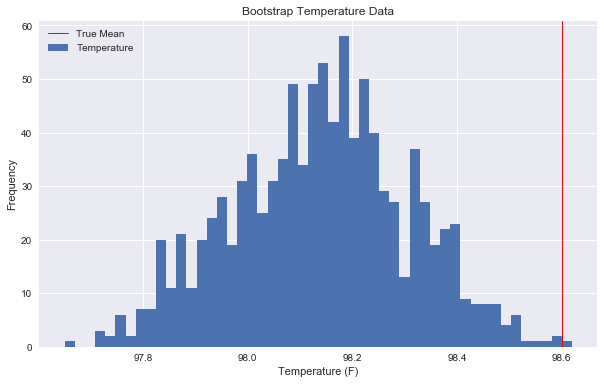

In [301]:
#Plot Bootstrap replicates of sample size 10
_ = plt.figure(figsize=(10,6))
_ = plt.hist(bs_replicates_small, bins=50)
_ = plt.axvline(98.6, color='red', linewidth=1)
_ = plt.title('Bootstrap Temperature Data')
_ = plt.legend(('True Mean','Temperature'))
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Frequency')

### t-test

In [305]:
#Calculate t-statistic = (true_mean - sample_mean) / (sample_std / sample_size)
print('T-statistic: ', (98.6 - np.mean(small_sample)) / (np.std(small_sample) / len(small_sample)))

T-statistic:  2.7866560003029885


### p-value

In [216]:
#Calculate p-value = (number_of_replicates larger than true_mean) / (sample_size)
print('P-value: ', np.sum(bs_replicates_small >= 98.6) / len(bs_replicates_small))

P-value:  0.003


### Conclusion

Observation: Smaller sample size results is larger spread of bootstrap means.  

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [119]:
#Get bootstrap replicates of size 1000
bs_replicates = draw_bs_reps(df.temperature, np.mean, size=1000)

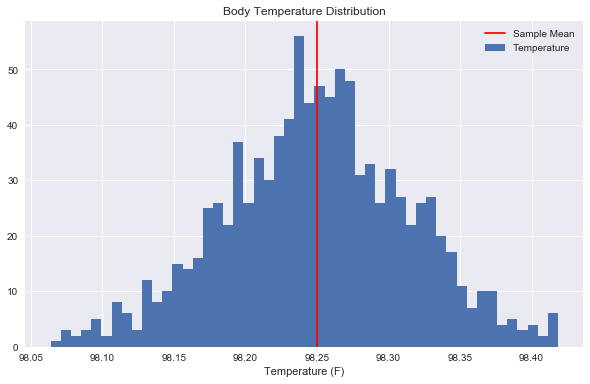

In [287]:
#Plot bootstrap distrbution of all body temperature data
_ = plt.figure(figsize=(10,6))
_ = plt.hist(bs_replicates, bins=50)
_ = plt.title('Body Temperature Distribution')
_ = plt.axvline(np.mean(bs_replicates), color='red')
_ = plt.xlabel('Temperature (F)')
_ = plt.legend(('Sample Mean','Temperature'))

In [129]:
#Describe data to show key statistics
df_description = pd.DataFrame(bs_replicates).describe()
df_description

,0
count,1000.000000
mean,98.249798
std,0.064906
min,98.063846
25%,98.206923
50%,98.250385
75%,98.293846
max,98.418462


### Mean, Standard Deviation, Median, Confidence Interval

In [134]:
#Print sample mean, std, median and 95% confidence interval
print('Sample Mean: ', df_description[0]['mean'])
print('Sample Standard Deviation: ', df_description[0]['std'])
print('Sample Median: ', df_description[0]['50%'])
print('95% Confidence Interval: ', list(np.percentile(bs_replicates, [2.5,97.5])))

Sample Mean:  98.24979846153855
Sample Standard Deviation:  0.06490559772397037
Sample Median:  98.2503846153846
95% Confidence Interval:  [98.11384615384615, 98.37388461538461]


### Conclusion

The 95% Confidence Interval is [98.1 F, 98.4 F].  Anything out of this interval can be considered "abnormal"

## 6. Is there a significant difference between males and females in normal temperature?

In [72]:
#Separate Data by gender
male = df[df.gender == 'M']
female = df[df.gender == 'F']

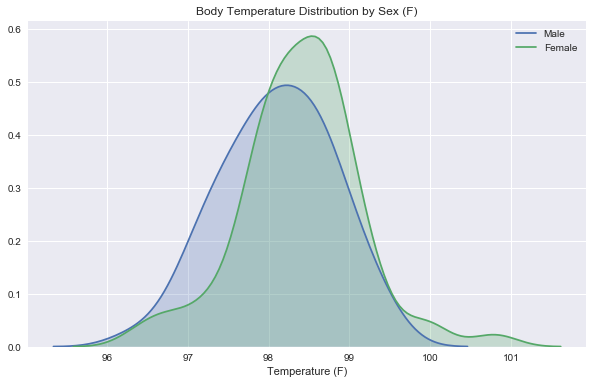

In [292]:
#Plot KDE plot to show distributions by gender
_ = plt.figure(figsize=(10,6))
_ = sns.kdeplot(male.temperature, shade=True)
_ = sns.kdeplot(female.temperature, shade=True)

_ = plt.title('Body Temperature Distribution by Sex (F)')
_ = plt.legend(('Male', 'Female'))
_ = plt.xlabel('Temperature (F)')

# Hypothesis Testing: Permutation Testing

<strong>Null Hypothesis</strong>: Male and Female normal temperatures have no difference.<br>
<strong>Alternative Hypothesis</strong>: Male and Female normal temperatures are difference.

In [102]:
#Calculate the true mean of the data
true_difference = np.mean(male.temperature) - np.mean(female.temperature)

In [99]:
#Empty array to store difference of mean permutation data
perm_replicates = np.empty(1000)

#Loop to get 1000 permutated difference of means
for x in range(1000):
    # Permutate all temperature data
    permuted_data = np.random.permutation(df.temperature)

    # Split into two lists with same proportion of male and female
    perm_male = permuted_data[:len(male)]
    perm_female = permuted_data[len(male):]
    
    perm_replicates[x] = np.mean(perm_male) - np.mean(perm_female)

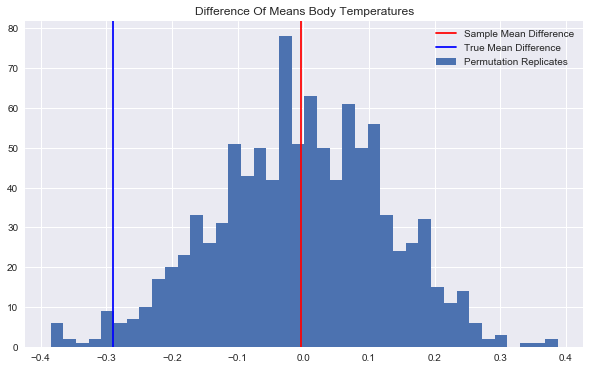

In [299]:
#Plot Distribution of difference of means with sample and true mean values shown
_ = plt.figure(figsize=(10,6))
_ = plt.hist(perm_replicates, bins=40)
_ = plt.axvline(np.mean(perm_replicates), color = 'red')
_ = plt.axvline(true_difference, color = 'blue')
_ = plt.title('Difference Of Means Body Temperatures')
_ = plt.legend(('Sample Mean Difference', 'True Mean Difference', 'Permutation Replicates'))

In [304]:
#Print True difference, Sample Mean, and Confidence Level
print('True Difference: ', true_difference)
print('Sample Mean: ', np.mean(perm_replicates))
print('95% Confidence Level: ', np.percentile(perm_replicates, [2.5,97.5]))

True Difference:  -0.289230769230727
Sample Mean:  -0.003529230769230722
95% Confidence Level:  [-0.27076923  0.23692308]


In [296]:
#Print P-value
print('P-value: ', np.sum(perm_replicates <= true_difference) / len(perm_replicates))

P-value:  0.02


### Conclusion

Because the P-value is lower than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the normal temperature of males and females with females having a slightly higher temperature than males.